In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 
import seaborn as sns 

plt.style.use("ggplot")  
pd.set_option("display.max_columns", 200)

In [36]:
df=pd.read_csv("coaster_db.csv")
# Recognize the Dataset , number of Rows and columns
print(df.shape)
# to display the first 5 rows of the dataframe
df.head(5)

(1087, 56)


,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [37]:
#  display all the columns of the dataframe
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [38]:
#statistics and numeric data about dataset 
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [39]:
# Data preparation 
# Removing columns from dataset
# copy for referece
df=df[['coaster_name',# 'Length', 'Speed', 
     'Location', 'Status', 'Opening date',
       #'Type',
        'Manufacturer', #'Height restriction', 'Model', 'Height',
      # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',# 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', #'height_value', 'height_unit',
        'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()


In [40]:
# Structure of the new dataset 
df.shape
# Transform the type to date time
#df.dtypes
df.columns
#df['opening_date_clean']=pd.to_datetime(df['opening_date_clean'])

Index(['coaster_name', 'Location', 'Status', 'Opening date', 'Manufacturer',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions_clean',
       'Gforce_clean'],
      dtype='object')

In [41]:
#Rename columns
df=df.rename(columns={'coaster_name':'Coaster_name', 'year_introduced': 'Year_introduced', 'latitude':'Latitude','longitude':'Longitude'})

In [42]:
#Identify missing values 
df.isna().sum()

Coaster_name            0
Location                0
Status                213
Opening date          250
Manufacturer           59
Year_introduced         0
Latitude              275
Longitude             275
Type_Main               0
opening_date_clean    250
speed_mph             150
height_ft             916
Inversions_clean        0
Gforce_clean          725
dtype: int64

In [43]:
#Removing duplicate values 
df = df.drop_duplicates(subset=['Coaster_name', 'Location', 'Opening date']) \
       .reset_index(drop=True).copy()


In [ ]:
#Final structure of the data set 
df

,Coaster_name,Location,Status,Opening date,Manufacturer,Year_introduced,Latitude,Longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,"June 16, 1884",LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,1895,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,1901,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,1901,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,February 2022,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Easter 2022,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,2022,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,NaN,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [46]:
#Count the values in a columns
df['Year_introduced'].value_counts()

Year_introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1952     1
1956     1
1961     1
1955     1
1959     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

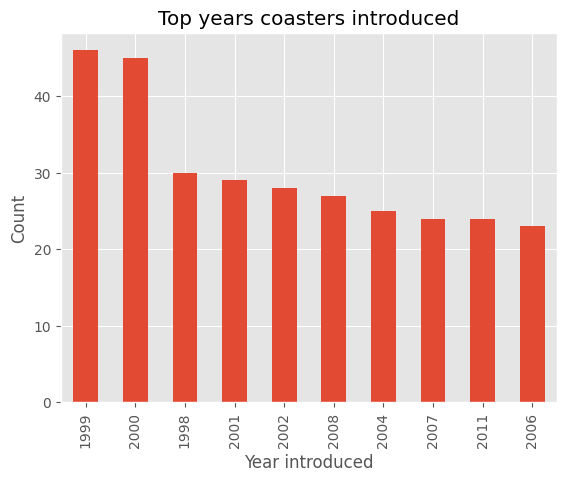

In [50]:
#plot
ax= df['Year_introduced'].value_counts()\
    .head(10)\
    .plot(kind='bar',title='Top years coasters introduced')
ax.set_xlabel('Year introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed(mph)')

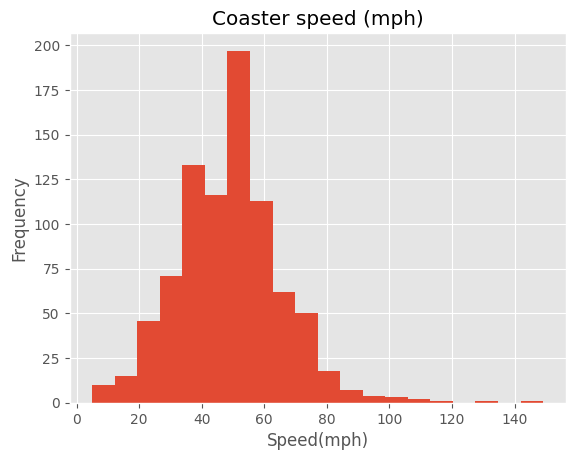

In [56]:
ax= df['speed_mph'].plot(kind='hist',bins=20,title='Coaster speed (mph)')
ax.set_xlabel('Speed(mph)')

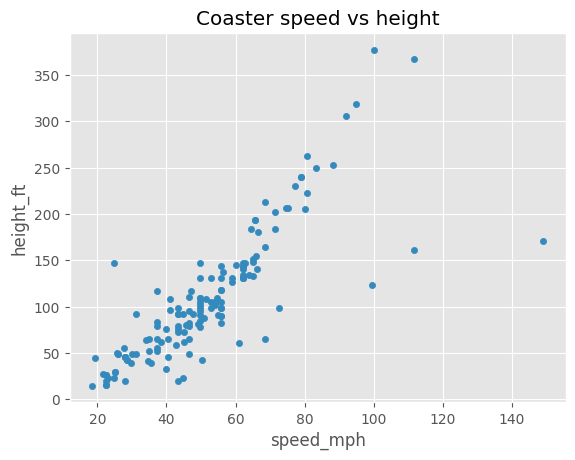

In [60]:
df.plot(kind='scatter',x='speed_mph',y='height_ft',title='Coaster speed vs height')
plt.show()

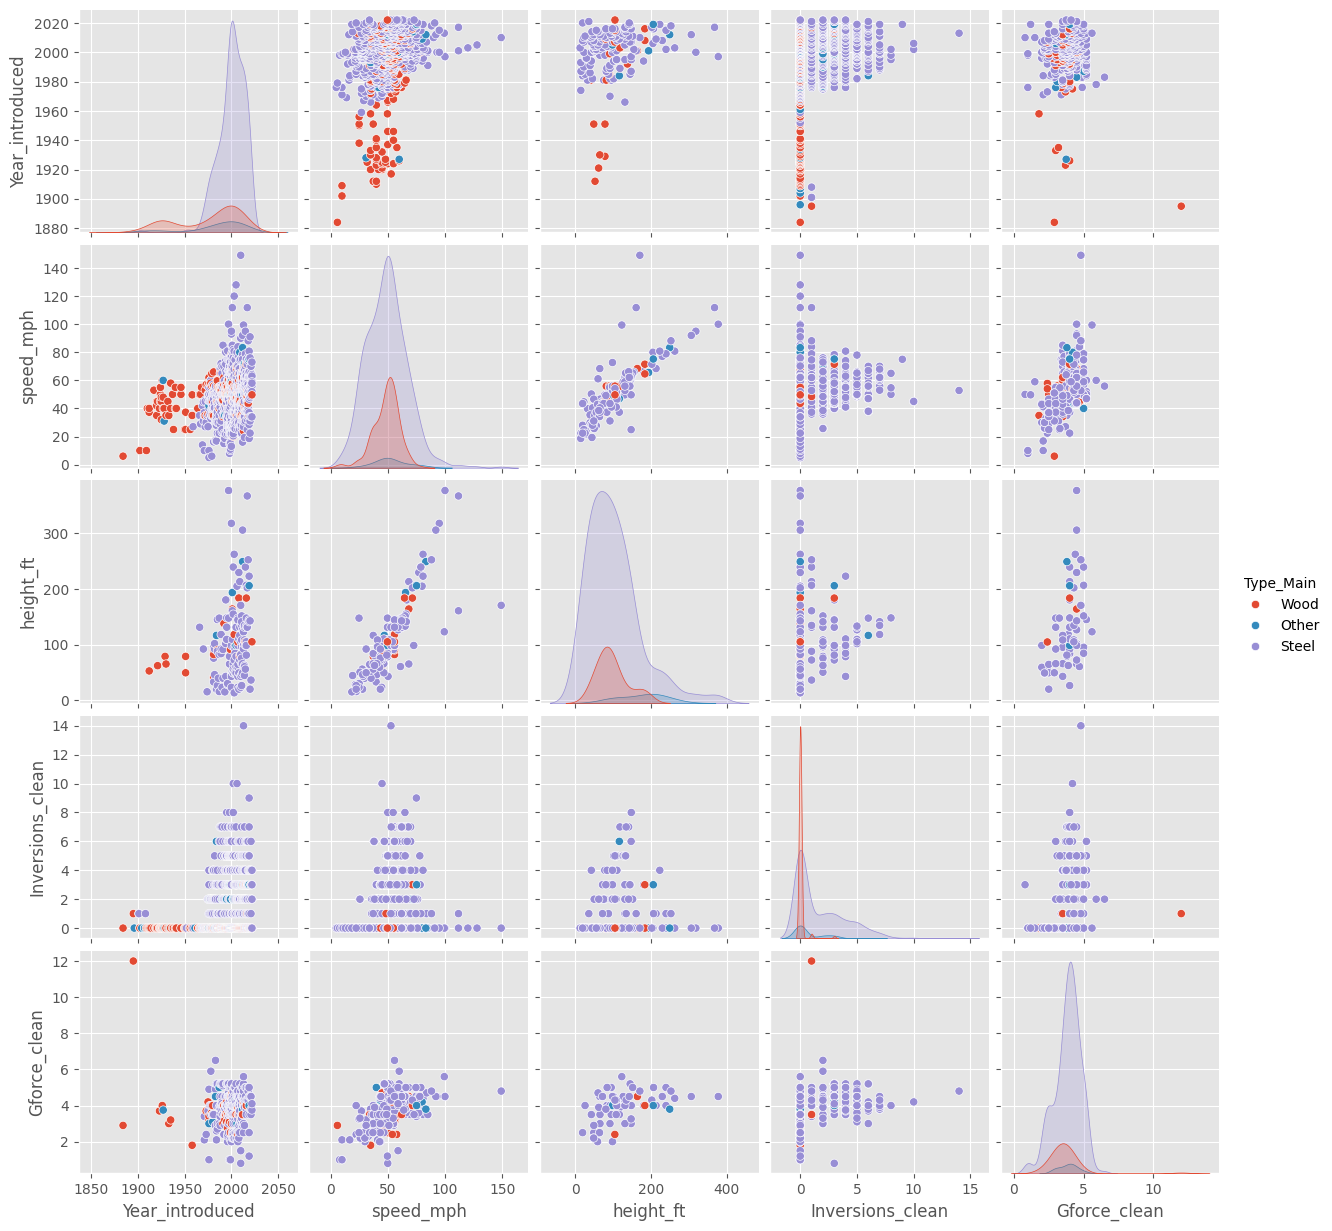

In [65]:
sns.pairplot(df,
             vars=['Year_introduced','speed_mph',
                   'height_ft','Inversions_clean','Gforce_clean'],
            hue='Type_Main')
plt.show()
